# Practica No 5: Juego de la Vida 


## Nombre:

###       Fernando Sanchez

## Enunciado:

### Emplear el programa del "Juego de la vida" de Jhon Conway para realizar el siguiente proceso de simulación :

    - Determinar las variables que rigen el sistemas
    - Diseñar un plan de simulación que permita llegar a una configuración en que los autómatas celular no 
      varíen.
    - Diseñar un plan de pruebas automatizado, es decir, que sea controlado por el ordenador y que permita 
      lanzar una bateria de experimentos.
    - Recopilar los resultados de estos planes.

In [7]:
# Importar librerias necesarias
import pygame
import numpy as np
import time

col_about_to_die = (200, 200, 225)
col_alive = (255, 255, 215)
col_background = (10, 10, 40)
col_grid = (30, 30, 60)


In [11]:
def update(surface, cur, sz):
    # inicializado con ceros, las células muertas no están escritas en él
    aux = np.zeros((cur.shape[0], cur.shape[1]))

    for r, c in np.ndindex(cur.shape):
        num_alive = np.sum(cur[r-1:r+2, c-1:c+2]) - cur[r, c]

        if cur[r, c] == 1 and num_alive < 2 or num_alive > 3:
            time.sleep(0.5)
            col = col_about_to_die
        elif (cur[r, c] == 1 and 2 <= num_alive <= 3) or (cur[r, c] == 0 and num_alive == 3):
            aux[r, c] = 1
            col = col_alive

        col = col if cur[r, c] == 1 else col_background
        pygame.draw.rect(surface, col, (c*sz, r*sz, sz-1, sz-1))

    return aux

In [9]:
def inicio(dim_X, dim_Y):
    
    celdas = np.zeros((dim_Y, dim_X))
    #Comienza en la esquina superior izquierda, continuando con el estado inicial de la simulación
    patron = np.array([[1,1,1],[0,1,0]]);
    pos = (3,3)
    celdas[pos[0]:pos[0]+patron.shape[0], pos[1]:pos[1]+patron.shape[1]] = patron
    return celdas

In [ ]:
def main(dim_X, dim_Y, tamano_Celda):
    pygame.init()
    surface = pygame.display.set_mode((dim_X * tamano_Celda, dim_Y * tamano_Celda))
    pygame.display.set_caption("Juego de la Vida")

    celdas = inicio(dim_X, dim_Y)

    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                return

        surface.fill(col_grid)
        celdas = update(surface, celdas, tamano_Celda)
        pygame.display.update()

if __name__ == "__main__":
    main(20, 20, 15)

# Resultados

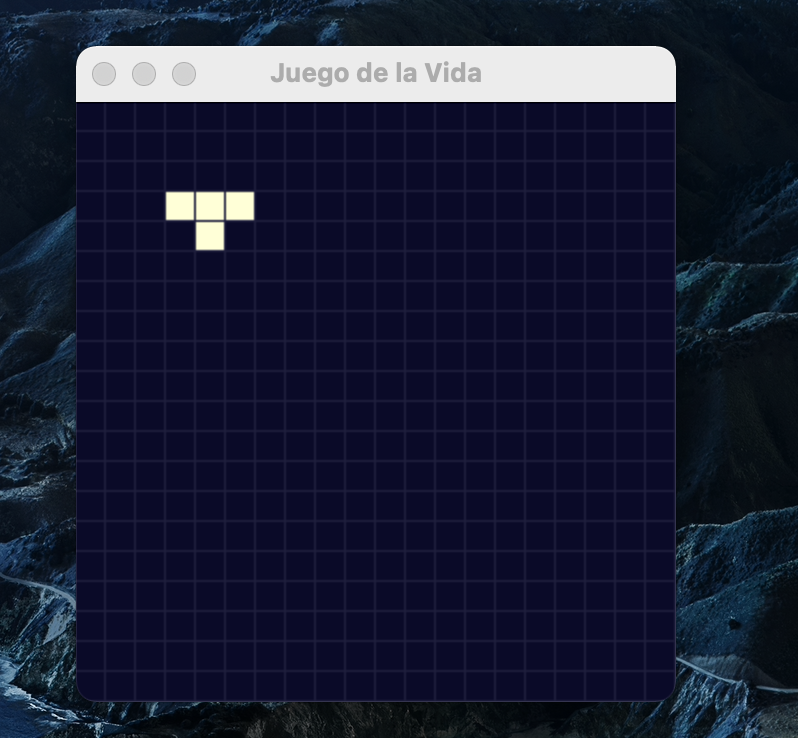


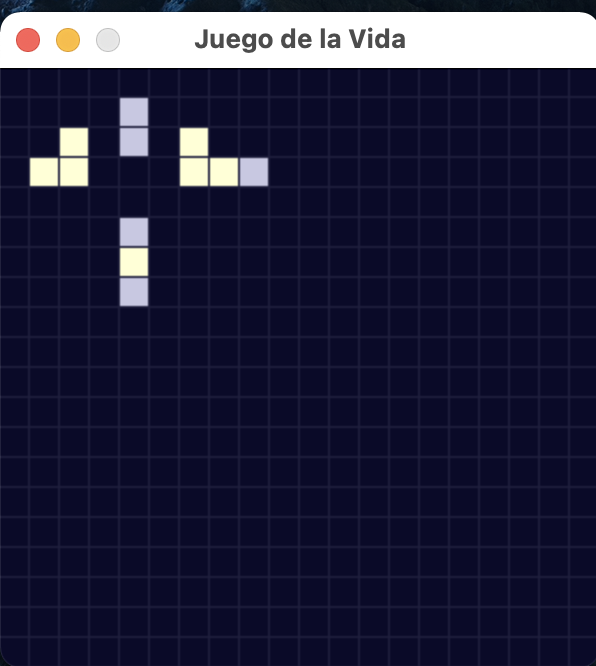